## BDM Project

### Importing Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Set the search parameters
filename = 'SalesData.xlsx'
search_path = '/content/drive/My Drive/BDM Data'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_excel('/content/drive/My Drive/BDM Data/SalesData.xlsx')

In [6]:
df.shape

(223155, 37)

### Pre-Processing

In [7]:
df.shape

(223155, 37)

In [8]:
df.head()

,DATA_FROM,QUARTER,TIME_PERIOD,CURRENCY_NAME,BUSINESS_UNIT,CHAI_MAPPING,PARTNER_MARKET,PARTNER_COUNTRY,PARTNER_CLUSTER,PRODUCT_SEGMENT,...,REVENUE_USD,UNITS,SLS_TTY_IDENTIFIER,RAD_VERTICAL,EMP_TOTAL,EMPLOYEE_GROUP,TAM_PRINT,TAM_PS,REVENUE_PRINT,REVENUE_PS
0,Sell-To,CY20-Q1,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,391.78,4.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN
1,Sell-To,CY23-Q2,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,70.92,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN
2,Sell-To,CY22-Q4,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,238.73,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN
3,Sell-To,CY23-Q1,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,200.75,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN
4,Sell-To,CY20-Q4,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,406.44,4.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN


In [9]:
df.rename(columns = {'PrarowasRTNrarR_HQ_NrarowasMrar':'PARTNER_HQ_NAME'}, inplace = True)

Removing Useless Columns:

In [10]:
df = df.drop(['CURRENCY_NAME'], axis=1)

In [11]:
#NUMBER OF UNIQUE VALUES
print('BUSINESS UNIT:', df['BUSINESS_UNIT'].nunique())
print('CHAI_MAPPING:', df['CHAI_MAPPING'].nunique())
print('PRODUCT_SEGMENT:', df['PRODUCT_SEGMENT'].nunique())
print('PRODUCT_GROUP:', df['PRODUCT_GROUP'].nunique())
print('PRODUCT_CATEGORY:',df['PRODUCT_CATEGORY'].nunique())
print('PRODUCT_LINE_ID:',df['PRODUCT_LINE_ID'].nunique())

BUSINESS UNIT: 3
CHAI_MAPPING: 8
PRODUCT_SEGMENT: 19
PRODUCT_GROUP: 37
PRODUCT_CATEGORY: 74
PRODUCT_LINE_ID: 107


In [12]:
df = df.drop(['CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'PRODUCT_LINE_ID'], axis=1)

In [13]:
#NUMBER OF UNIQUE VALUES
print('PARTNER_MARKET:', df['PARTNER_MARKET'].nunique())
print('PARTNER_CLUSTER:', df['PARTNER_CLUSTER'].nunique())
print('PARTNER_COUNTRY:', df['PARTNER_COUNTRY'].nunique())

PARTNER_MARKET: 7
PARTNER_CLUSTER: 12
PARTNER_COUNTRY: 13


In [14]:
df = df.drop(['PARTNER_CLUSTER', 'PARTNER_COUNTRY'], axis=1)

In [15]:
df.shape

(223155, 30)

In [16]:
print('PARTNER_CUSTOMER_ID:', df['PARTNER_CUSTOMER_ID'].nunique())
print('PARTNER_HQ_NAME:', df['PARTNER_HQ_NAME'].nunique())
print('PARTNER_LEVEL:', df['PARTNER_LEVEL'].nunique())

PARTNER_CUSTOMER_ID: 18970
PARTNER_HQ_NAME: 15
PARTNER_LEVEL: 3


In [17]:
print('OPSI_ID:', df['OPSI_ID'].nunique())
print('IS_OPSI:', df['IS_OPSI'].nunique())
print('ORG_ID:', df['ORG_ID'].nunique())
print('ORGANIZATION_EXTENDED_NAME:', df['ORGANIZATION_EXTENDED_NAME'].nunique())
print('ST_ID:', df['ST_ID'].nunique())
print('SALES_TERRITORY_EXTENDED_NAME:', df['SALES_TERRITORY_EXTENDED_NAME'].nunique())
print('ONLINE_FLAG:', df['ONLINE_FLAG'].nunique())
print('EMPLOYEE_GROUP:', df['EMPLOYEE_GROUP'].nunique())

OPSI_ID: 15918
IS_OPSI: 2
ORG_ID: 7693
ORGANIZATION_EXTENDED_NAME: 7498
ST_ID: 2418
SALES_TERRITORY_EXTENDED_NAME: 2409
ONLINE_FLAG: 2
EMPLOYEE_GROUP: 6


In [18]:
#Finding the missing values:
df.isna().sum()

,0
DATA_FROM,0
QUARTER,0
TIME_PERIOD,0
BUSINESS_UNIT,0
PARTNER_MARKET,0
PRODUCT_CATEGORY,0
PARTNER_HQ_NAME,0
PARTNER_ID,0
PARTNER_CUSTOMER_ID,26874
PARTNER_LEVEL,0


Removing columns with lot of missing values (More than half the total datapoints):

In [19]:
df = df.drop(['OPSI_ID','ORG_ID', 'ORGANIZATION_EXTENDED_NAME','ST_ID','SALES_TERRITORY_EXTENDED_NAME','REAL_UNITS','SLS_TTY_IDENTIFIER','RAD_VERTICAL','EMP_TOTAL','TAM_PRINT','TAM_PS','REVENUE_PRINT','REVENUE_PS'], axis=1)

In [20]:
df = df.drop(['REVENUE_LC', 'TIME_PERIOD'], axis=1)

In [21]:
df.head()

,DATA_FROM,QUARTER,BUSINESS_UNIT,PARTNER_MARKET,PRODUCT_CATEGORY,PARTNER_HQ_NAME,PARTNER_ID,PARTNER_CUSTOMER_ID,PARTNER_LEVEL,IS_OPSI,ONLINE_FLAG,PRODUCT_UNITS,REVENUE_USD,UNITS,EMPLOYEE_GROUP
0,Sell-To,CY20-Q1,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13690,Power Services,True,NaN,4.0,391.78,4.0,NOT IDENTIFIED
1,Sell-To,CY23-Q2,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13438,Power Services,True,N,1.0,70.92,1.0,NOT IDENTIFIED
2,Sell-To,CY22-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15330,Power Services,True,N,1.0,238.73,1.0,NOT IDENTIFIED
3,Sell-To,CY23-Q1,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15322,Power Services,True,N,1.0,200.75,1.0,NOT IDENTIFIED
4,Sell-To,CY20-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13521,Power Services,True,NaN,4.0,406.44,4.0,NOT IDENTIFIED


Processing Date from Quarters:

In [22]:
typ = df['QUARTER'].str.slice(0, 2, 1)
year = '20' + df['QUARTER'].str.slice(2, 4, 1)
qtr = df['QUARTER'].str.slice(5, 7, 1)

In [23]:
saledate = []
for i in range(0,len(typ)):
  st = ""
  if(typ[i] == 'CY'):
    if qtr[i] == 'Q1':
      st = st + year[i] + '-01' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-04' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-07' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-10' + '-01'
  else:
    if qtr[i] == 'Q1':
      st = st + year[i] + '-11' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-02' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-05' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-08' + '-01'
  saledate.append(st)

In [24]:
from datetime import timedelta
df['DATE'] = saledate
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATA_FROM,QUARTER,BUSINESS_UNIT,PARTNER_MARKET,PRODUCT_CATEGORY,PARTNER_HQ_NAME,PARTNER_ID,PARTNER_CUSTOMER_ID,PARTNER_LEVEL,IS_OPSI,ONLINE_FLAG,PRODUCT_UNITS,REVENUE_USD,UNITS,EMPLOYEE_GROUP,DATE
0,Sell-To,CY20-Q1,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13690,Power Services,True,NaN,4.0,391.78,4.0,NOT IDENTIFIED,2020-01-01
1,Sell-To,CY23-Q2,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13438,Power Services,True,N,1.0,70.92,1.0,NOT IDENTIFIED,2023-04-01
2,Sell-To,CY22-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15330,Power Services,True,N,1.0,238.73,1.0,NOT IDENTIFIED,2022-10-01
3,Sell-To,CY23-Q1,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15322,Power Services,True,N,1.0,200.75,1.0,NOT IDENTIFIED,2023-01-01
4,Sell-To,CY20-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13521,Power Services,True,NaN,4.0,406.44,4.0,NOT IDENTIFIED,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223150,Sell-To,FY21-Q3,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,67519,Power Services,True,N,3.0,500.36,3.0,506541000,2021-05-01
223151,Sell-To,FY22-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15303,Power Services,True,N,9.0,1612.35,9.0,506541000,2022-08-01
223152,Sell-To,FY21-Q4,Printing HW,North America,Office Non Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,26103,Power Services,True,N,1.0,783.41,1.0,> 1000,2021-08-01
223153,Sell-To,FY20-Q3,Printing HW,North America,Office Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,WS7038,Power Services,True,NaN,2.0,3672.32,2.0,065410-2023,2020-05-01


In [25]:
import datetime
from datetime import datetime
saledate2 = []
for i in saledate:
  dt = datetime.strptime(i, '%Y-%m-%d')
  saledate2.append(dt)

In [26]:
df = df.drop(['EMPLOYEE_GROUP', 'QUARTER'], axis = 1)

In [27]:
df['DATE'] = saledate2
df

,DATA_FROM,BUSINESS_UNIT,PARTNER_MARKET,PRODUCT_CATEGORY,PARTNER_HQ_NAME,PARTNER_ID,PARTNER_CUSTOMER_ID,PARTNER_LEVEL,IS_OPSI,ONLINE_FLAG,PRODUCT_UNITS,REVENUE_USD,UNITS,DATE
0,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13690,Power Services,True,NaN,4.0,391.78,4.0,2020-01-01
1,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13438,Power Services,True,N,1.0,70.92,1.0,2023-04-01
2,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15330,Power Services,True,N,1.0,238.73,1.0,2022-10-01
3,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15322,Power Services,True,N,1.0,200.75,1.0,2023-01-01
4,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13521,Power Services,True,NaN,4.0,406.44,4.0,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223150,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,67519,Power Services,True,N,3.0,500.36,3.0,2021-05-01
223151,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15303,Power Services,True,N,9.0,1612.35,9.0,2022-08-01
223152,Sell-To,Printing HW,North America,Office Non Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,26103,Power Services,True,N,1.0,783.41,1.0,2021-08-01
223153,Sell-To,Printing HW,North America,Office Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,WS7038,Power Services,True,NaN,2.0,3672.32,2.0,2020-05-01


In [28]:
BU = df['BUSINESS_UNIT'].unique()
MARKET = df['PARTNER_MARKET'].unique()

### DESCRIPTIVE DATA:

In [29]:
import matplotlib.pyplot as plt

FOR UNITS:


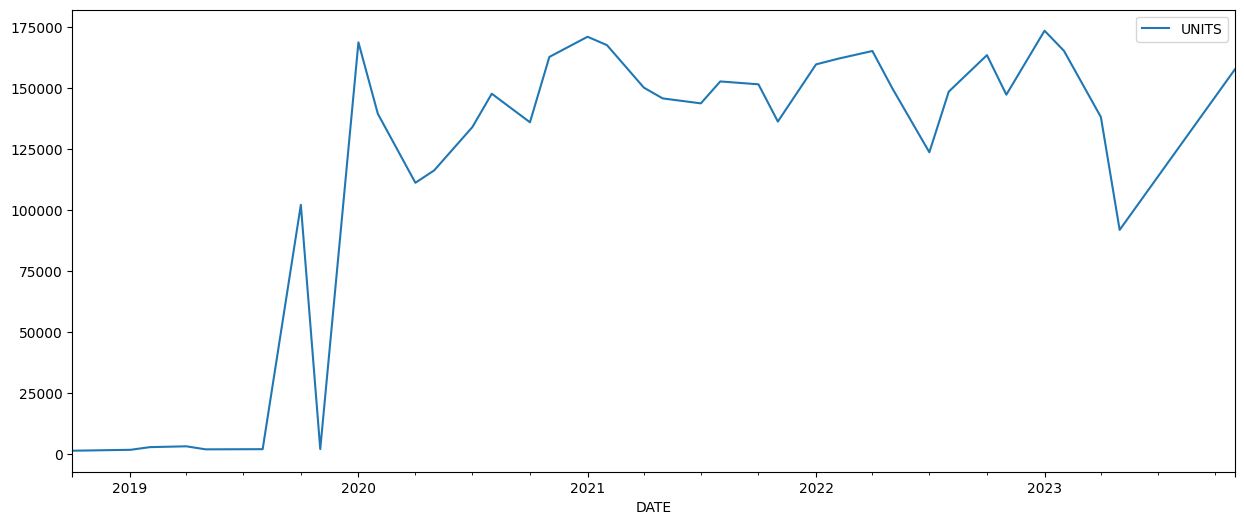

FOR REVENUE:


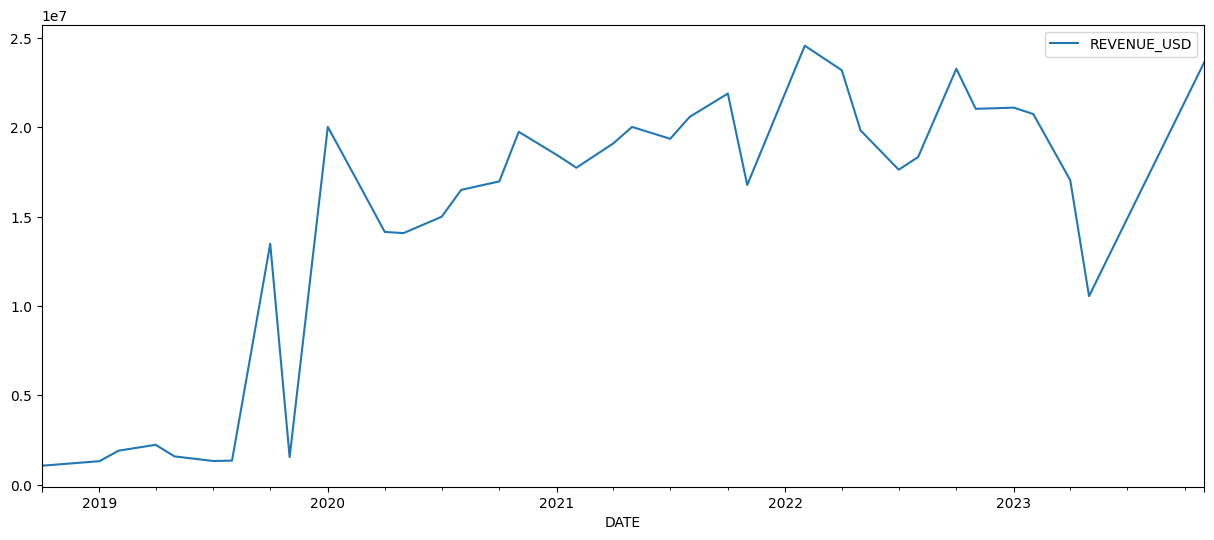

In [30]:
import matplotlib.pyplot as plt
df2 = df[['DATE','UNITS','REVENUE_USD']]
df2.set_index('DATE', inplace=True)
freq = 'D'  # Daily frequency
df_re = df2.resample(freq).agg({'UNITS': 'sum', 'REVENUE_USD': 'sum'})
df_re.replace(0, np.nan, inplace=True)
df_re['UNITS'].interpolate(method='linear', inplace=True)
df_re['REVENUE_USD'].interpolate(method='linear', inplace=True)
df_re_units = df_re.copy()
df_re_units = df_re_units.drop(['REVENUE_USD'], axis=1)
df_re_revenue = df_re.copy()
df_re_revenue = df_re_revenue.drop(['UNITS'], axis=1)
print("FOR UNITS:")
df_re_units.plot(figsize = (15, 6))
plt.show()
print("FOR REVENUE:")
df_re_revenue.plot(figsize = (15, 6))
plt.show()

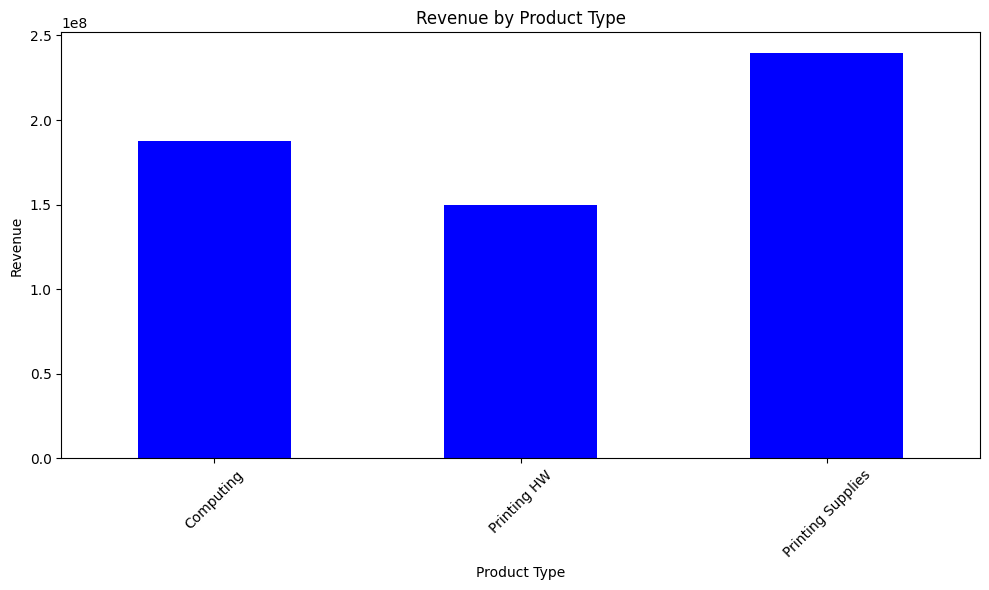

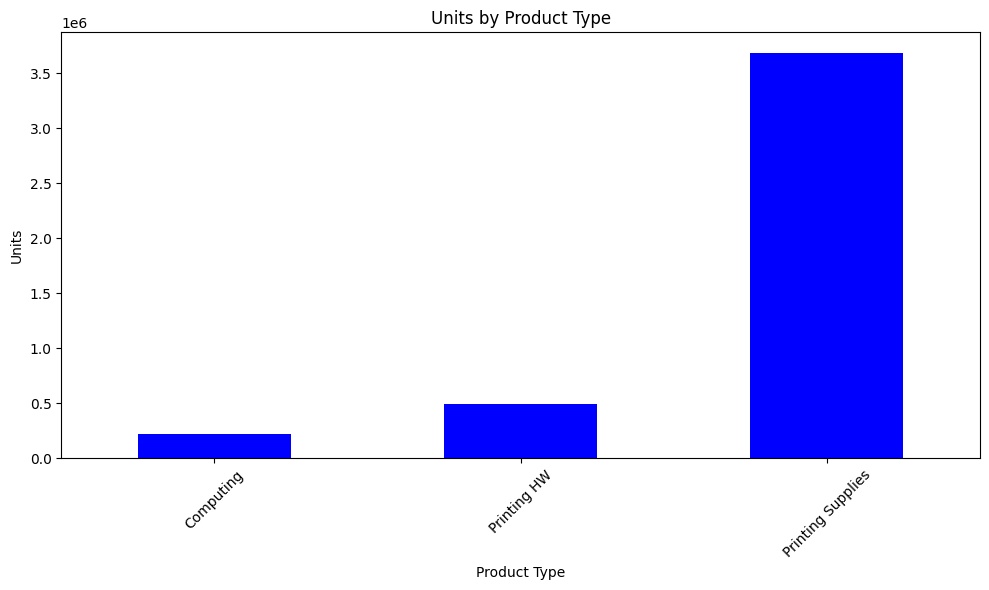

In [31]:
import matplotlib.pyplot as plt
revenue_by_product = df.groupby('BUSINESS_UNIT')['REVENUE_USD'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Product Type')
plt.ylabel('Revenue')
plt.title('Revenue by Product Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print("")
revenue_by_product = df.groupby('BUSINESS_UNIT')['UNITS'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Product Type')
plt.ylabel('Units')
plt.title('Units by Product Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

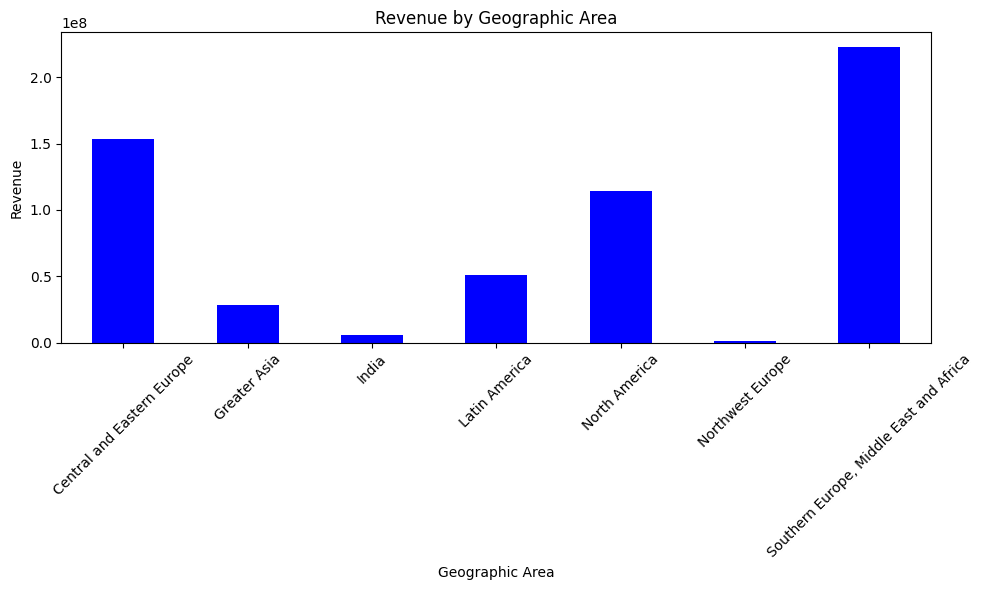

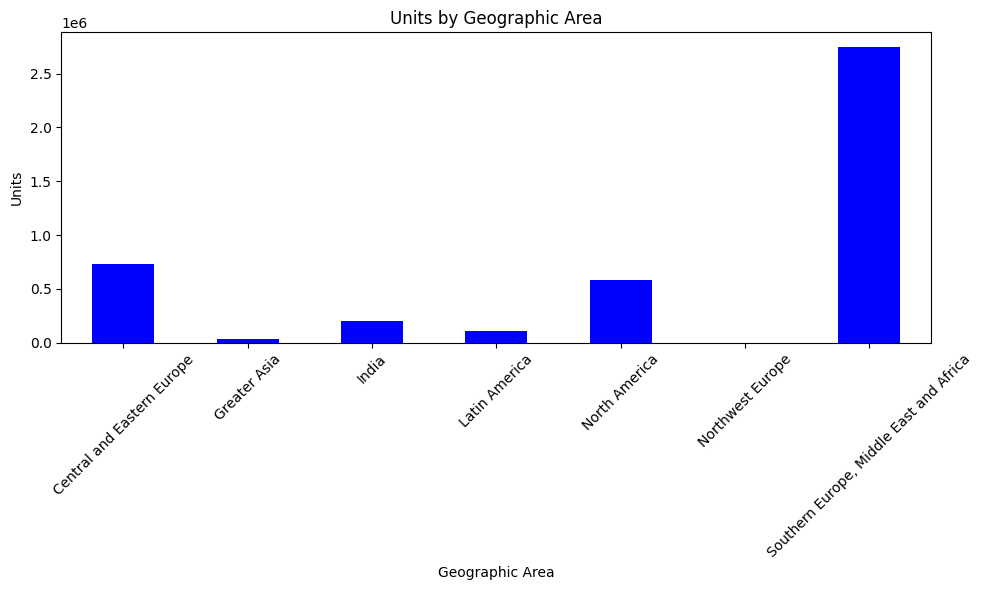

In [32]:
import matplotlib.pyplot as plt
revenue_by_product = df.groupby('PARTNER_MARKET')['REVENUE_USD'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Geographic Area')
plt.ylabel('Revenue')
plt.title('Revenue by Geographic Area')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print("")
revenue_by_product = df.groupby('PARTNER_MARKET')['UNITS'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Geographic Area')
plt.ylabel('Units')
plt.title('Units by Geographic Area')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

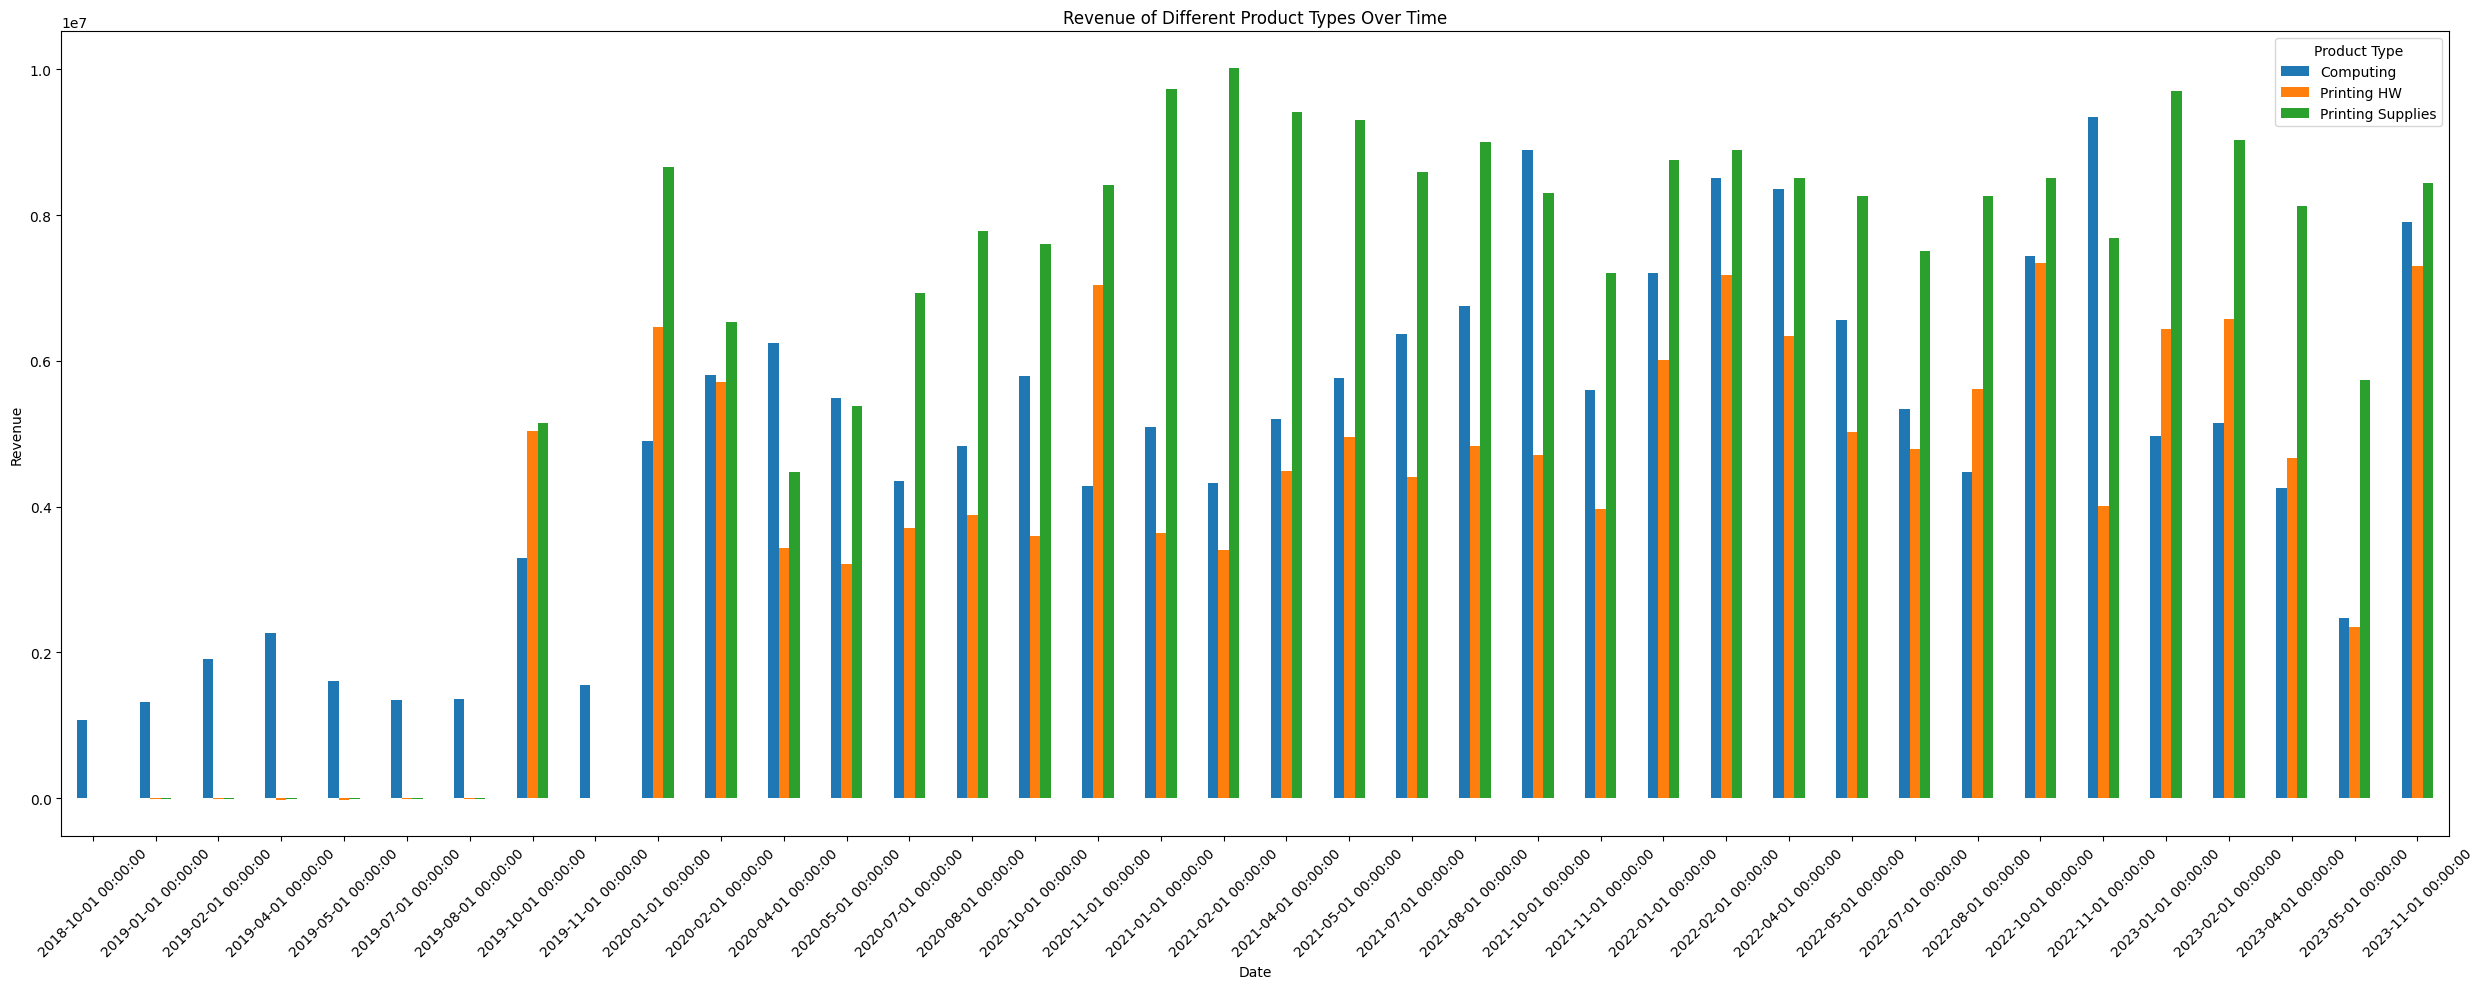

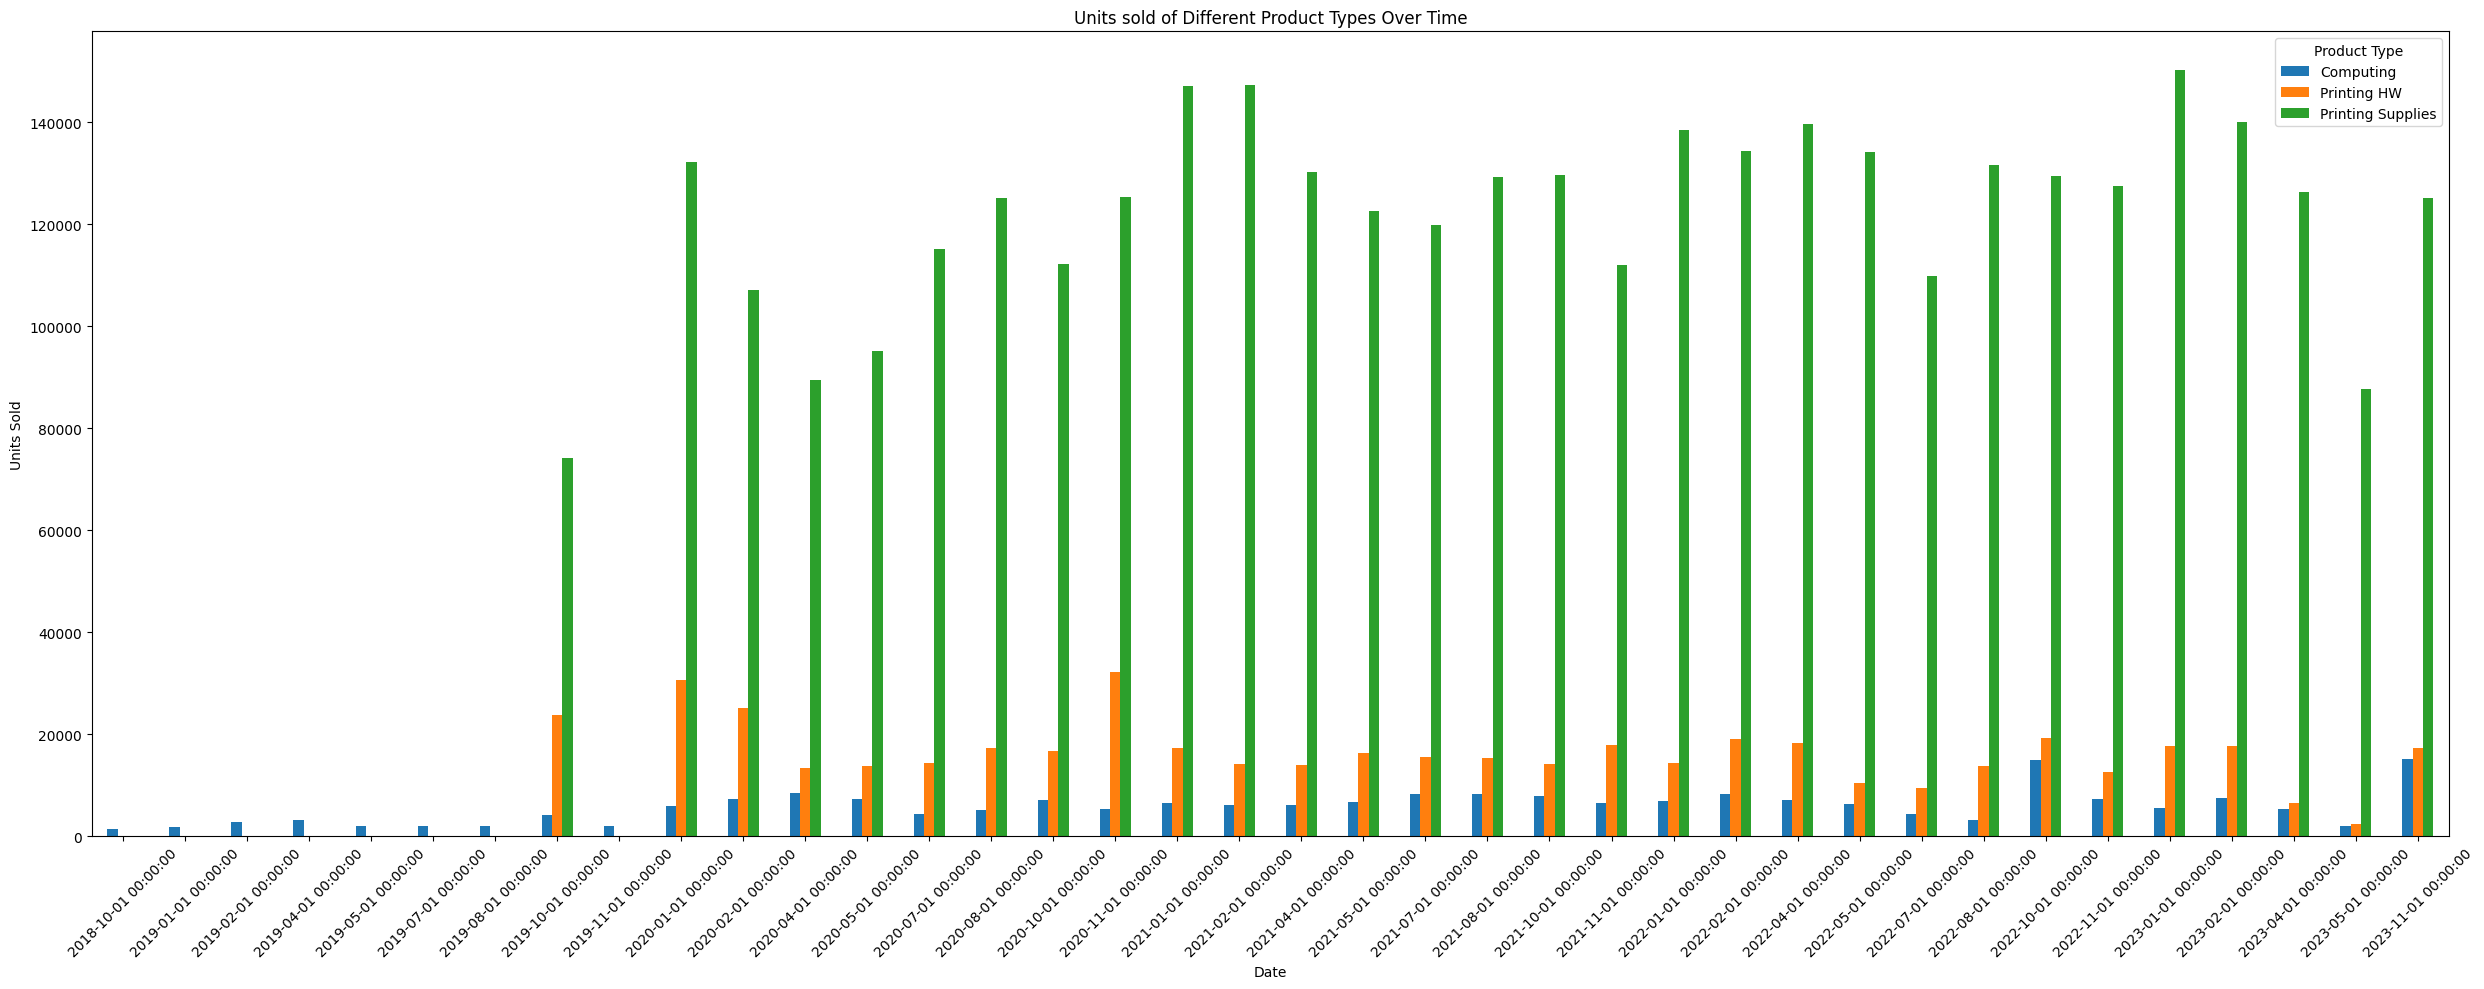

In [33]:
import matplotlib.pyplot as plt
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'BUSINESS_UNIT'])['REVENUE_USD'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue of Different Product Types Over Time')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()
print("")
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'BUSINESS_UNIT'])['UNITS'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Units sold of Different Product Types Over Time')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()

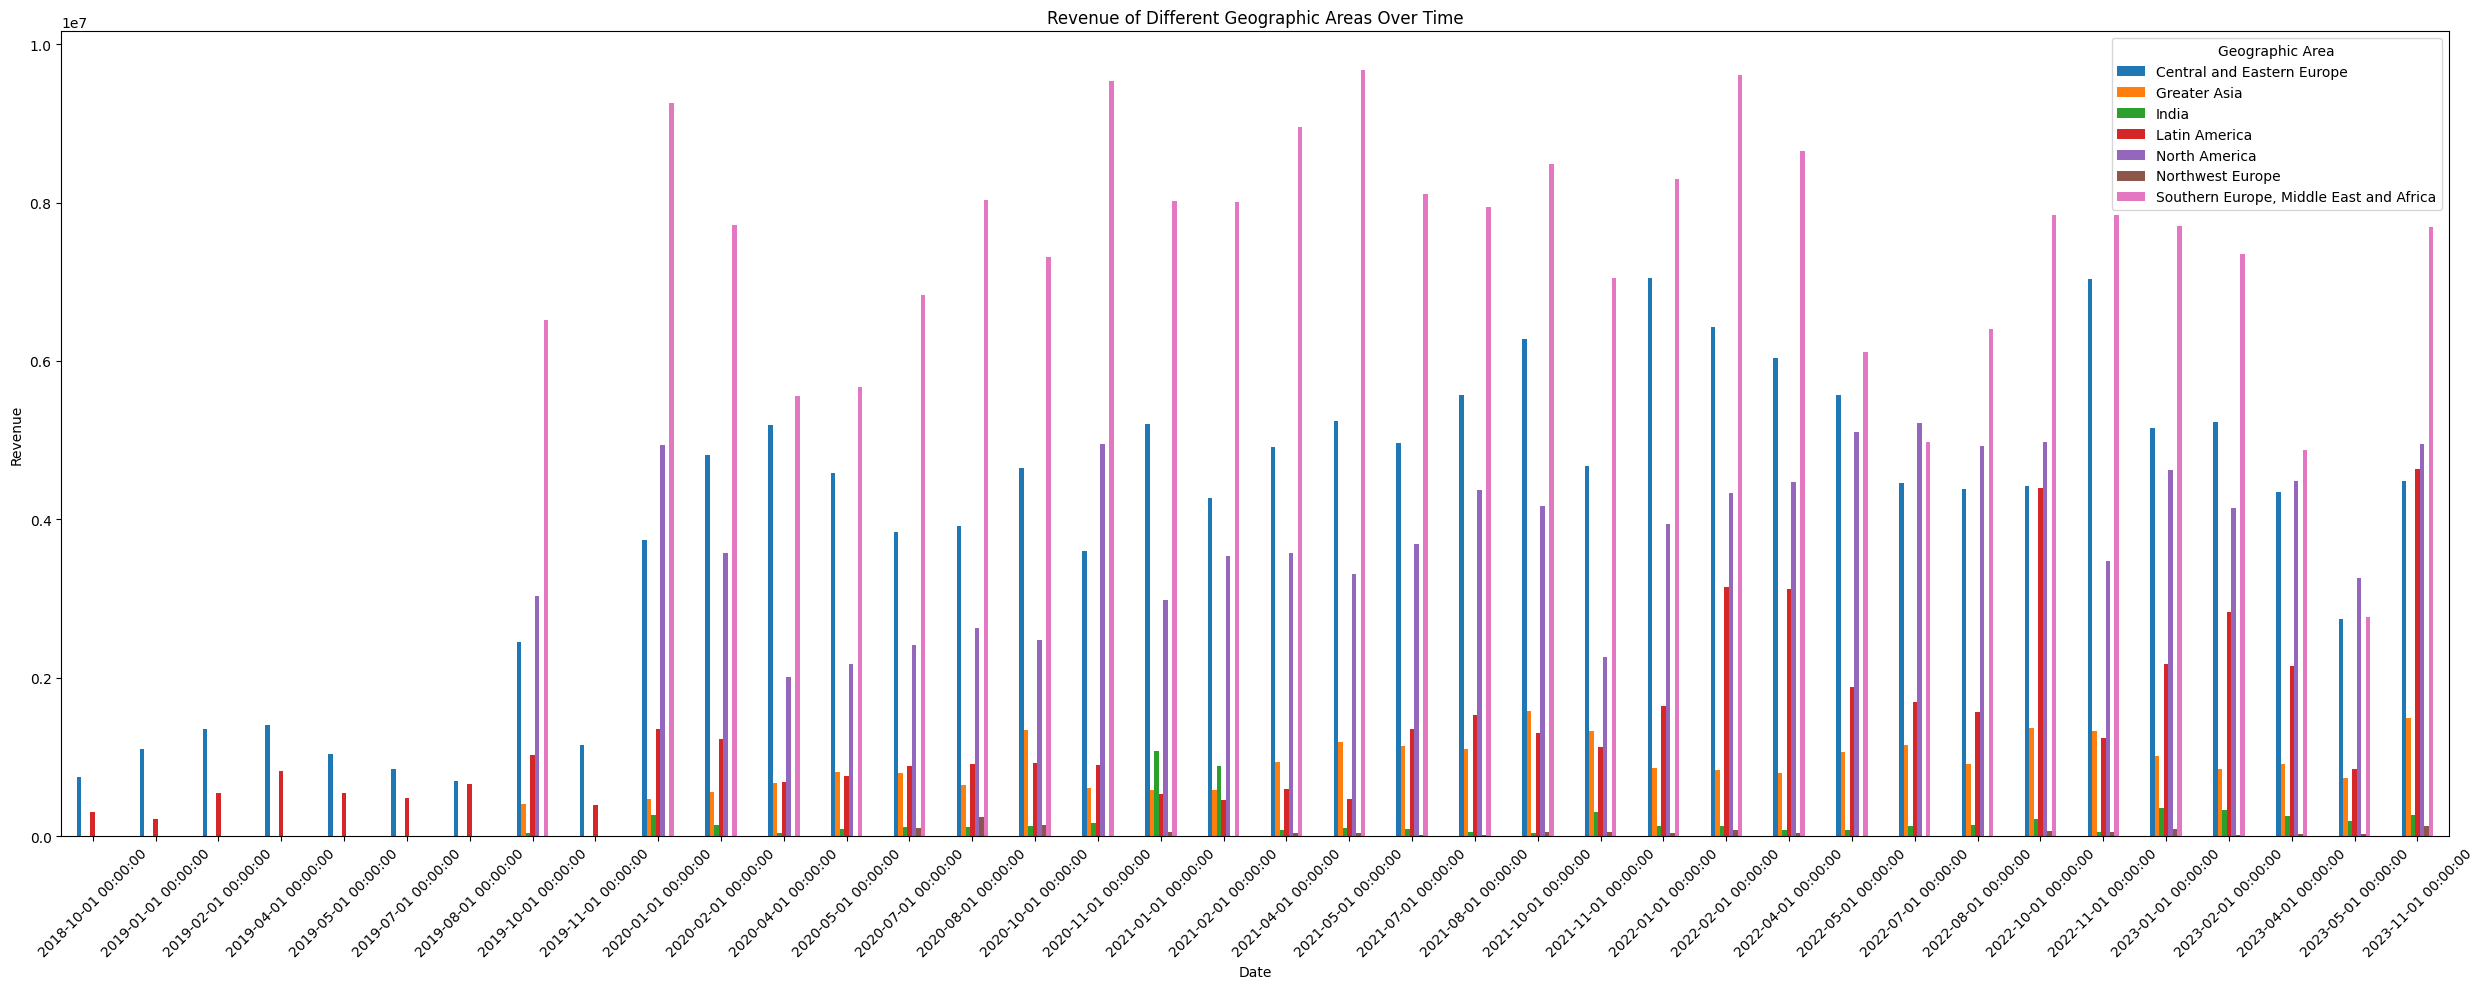

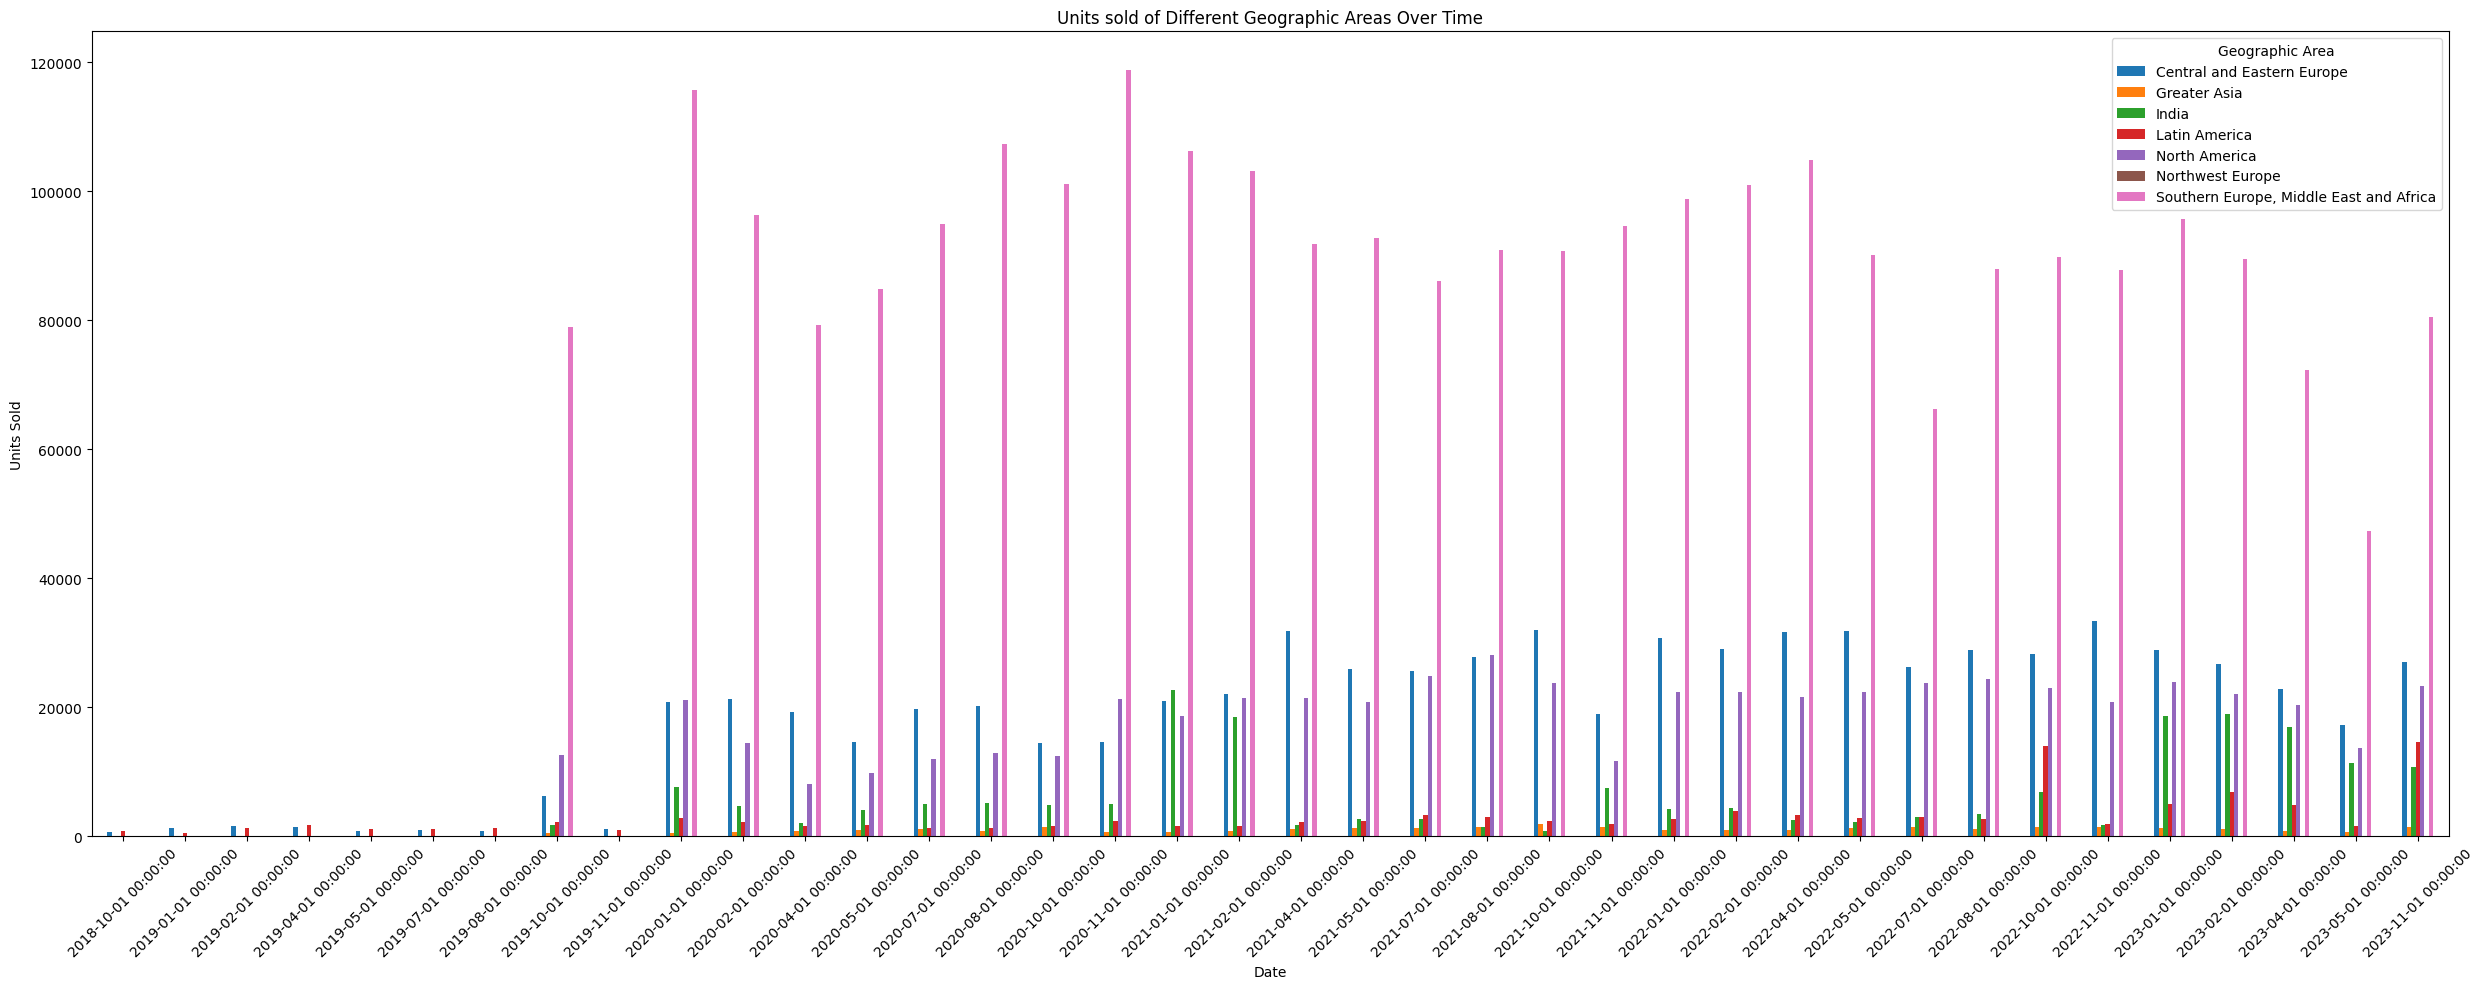

In [34]:
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'PARTNER_MARKET'])['REVENUE_USD'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue of Different Geographic Areas Over Time')
plt.xticks(rotation=45)
plt.legend(title='Geographic Area')
plt.tight_layout()
plt.show()
print("")
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'PARTNER_MARKET'])['UNITS'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Units sold of Different Geographic Areas Over Time')
plt.xticks(rotation=45)
plt.legend(title='Geographic Area')
plt.tight_layout()
plt.show()

#### Pareto Chart:

FOR REVENUE:

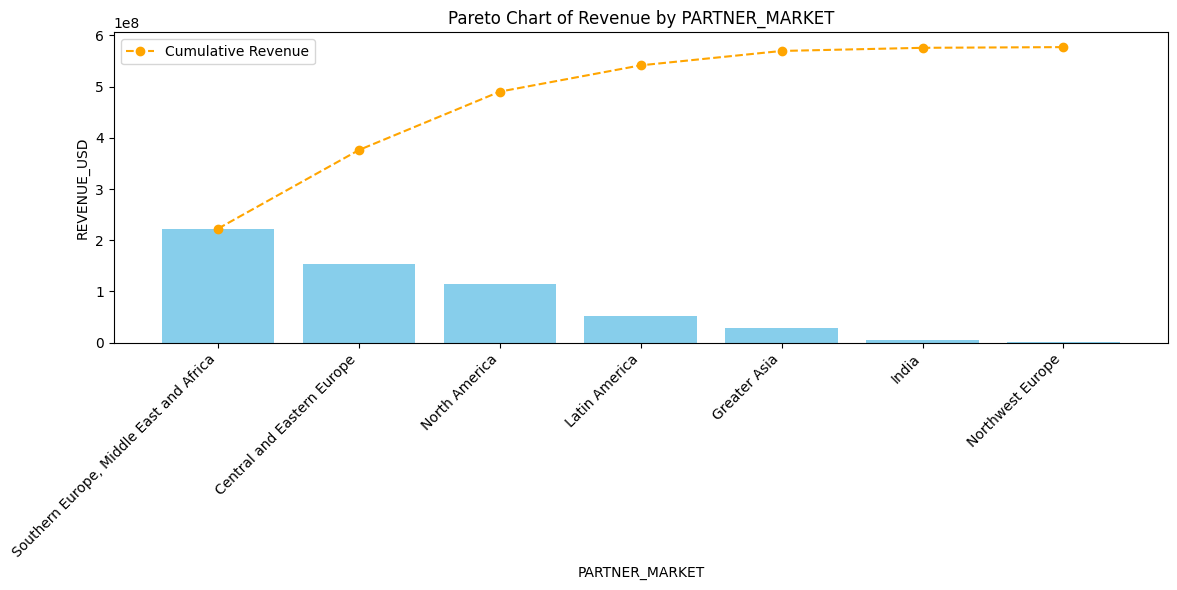

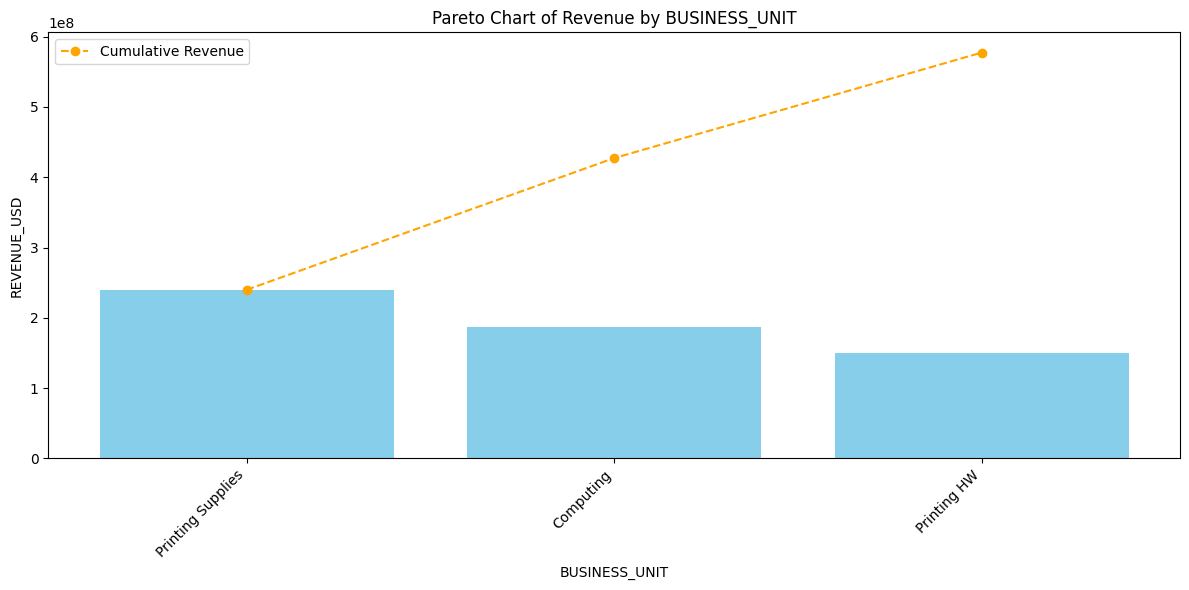

In [35]:
def pareto_chart(dataframe, category_column, value_column, title):
    grouped = dataframe.groupby(category_column)[value_column].sum().reset_index()
    sorted_df = grouped.sort_values(by=value_column, ascending=False)
    sorted_df['Cumulative Revenue'] = sorted_df[value_column].cumsum()
    plt.figure(figsize=(12, 6))
    #plt.bar(sorted_df.index, sorted_df[value_column], tick_label=sorted_df[category_column], color='skyblue')
    plt.bar(sorted_df[category_column],sorted_df[value_column], color='skyblue')
    #plt.plot(sorted_df['Cumulative Revenue'], color='orange', marker='o', linestyle='--')
    plt.plot(sorted_df[category_column],sorted_df['Cumulative Revenue'], color='orange', marker='o', linestyle='--')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(category_column)
    plt.ylabel(value_column)
    plt.title(title)
    plt.legend(['Cumulative Revenue'], loc='upper left')
    plt.tight_layout()
    plt.show()

pareto_chart(df, 'PARTNER_MARKET', 'REVENUE_USD', 'Pareto Chart of Revenue by PARTNER_MARKET')
print("")
# Create a Pareto chart for product units
pareto_chart(df, 'BUSINESS_UNIT', 'REVENUE_USD', 'Pareto Chart of Revenue by BUSINESS_UNIT')

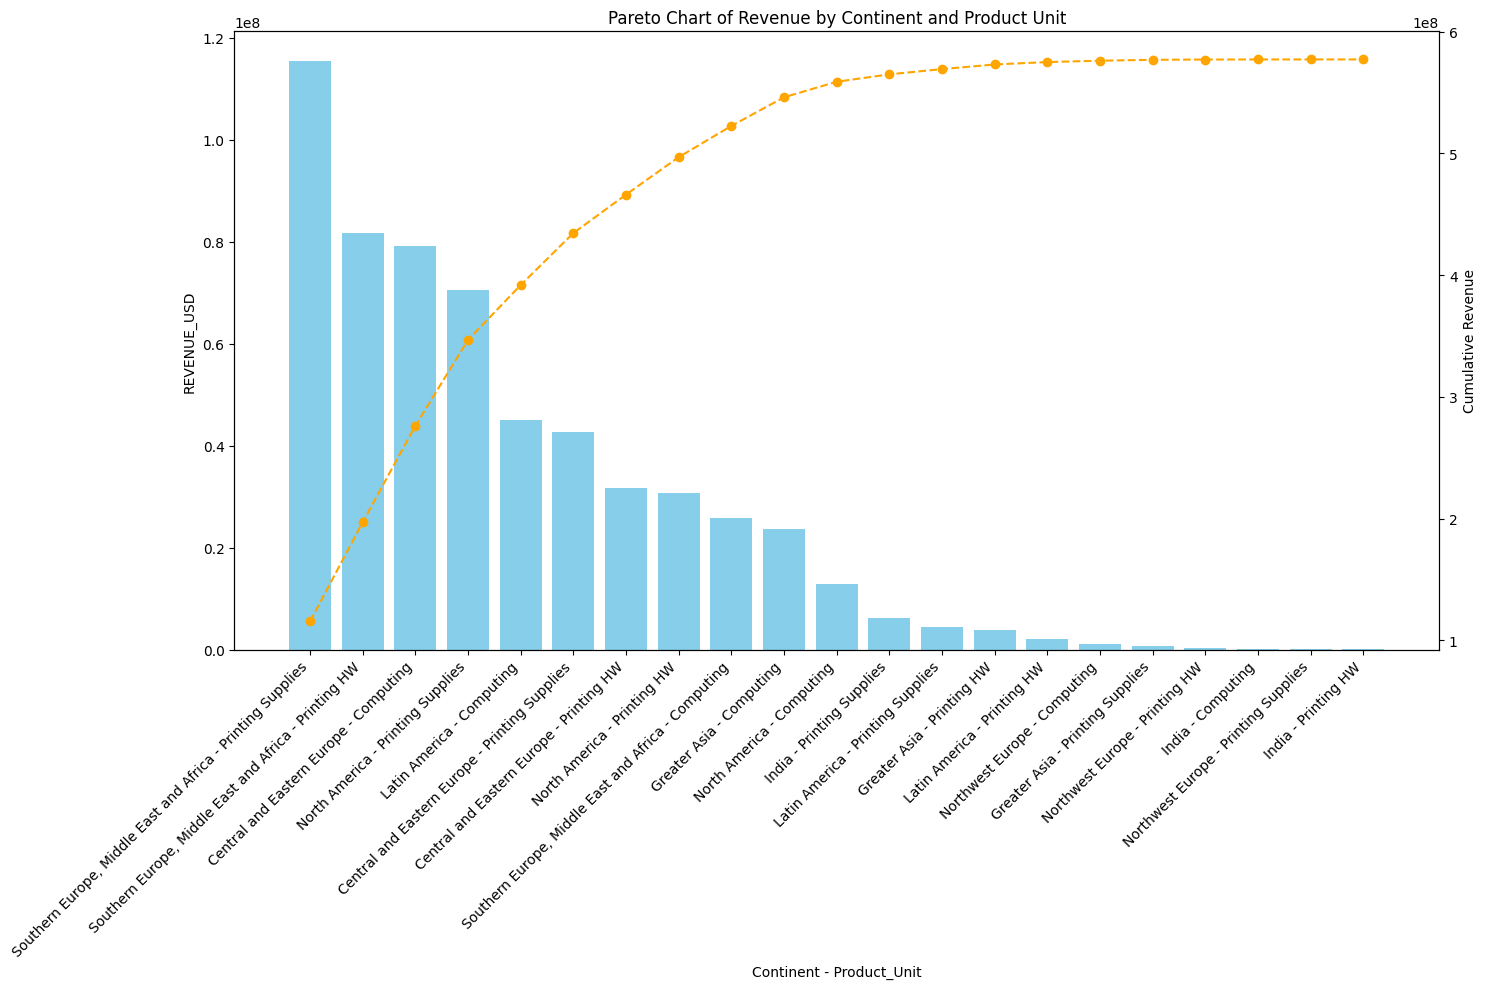

In [36]:
def plot_pareto(data, combined_category_column, value_column, title):
    data[combined_category_column] = data['PARTNER_MARKET'] + ' - ' + data['BUSINESS_UNIT']

    grouped = data.groupby(combined_category_column)[value_column].sum().reset_index()

    # Sort the data by revenue in descending order
    sorted_df = grouped.sort_values(by=value_column, ascending=False)

    # Calculate cumulative revenue
    sorted_df['Cumulative Revenue'] = sorted_df[value_column].cumsum()

    # Create the Pareto chart
    plt.figure(figsize=(15, 10))
    ax = plt.gca()
    ax.bar(sorted_df[combined_category_column], sorted_df[value_column], color='skyblue')
    ax2 = ax.twinx()
    ax2.plot(sorted_df[combined_category_column], sorted_df['Cumulative Revenue'], color='orange', marker='o', linestyle='--')
    ax.set_xticklabels(sorted_df[combined_category_column], rotation=45, ha='right')
    ax.set_xlabel(combined_category_column)
    ax.set_ylabel(value_column)
    ax2.set_ylabel('Cumulative Revenue')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Call the function to create a Pareto chart combining 'Continent' and 'Product_Unit'
plot_pareto(df, 'Continent - Product_Unit', 'REVENUE_USD', 'Pareto Chart of Revenue by Continent and Product Unit')

FOR UNITS SOLD:

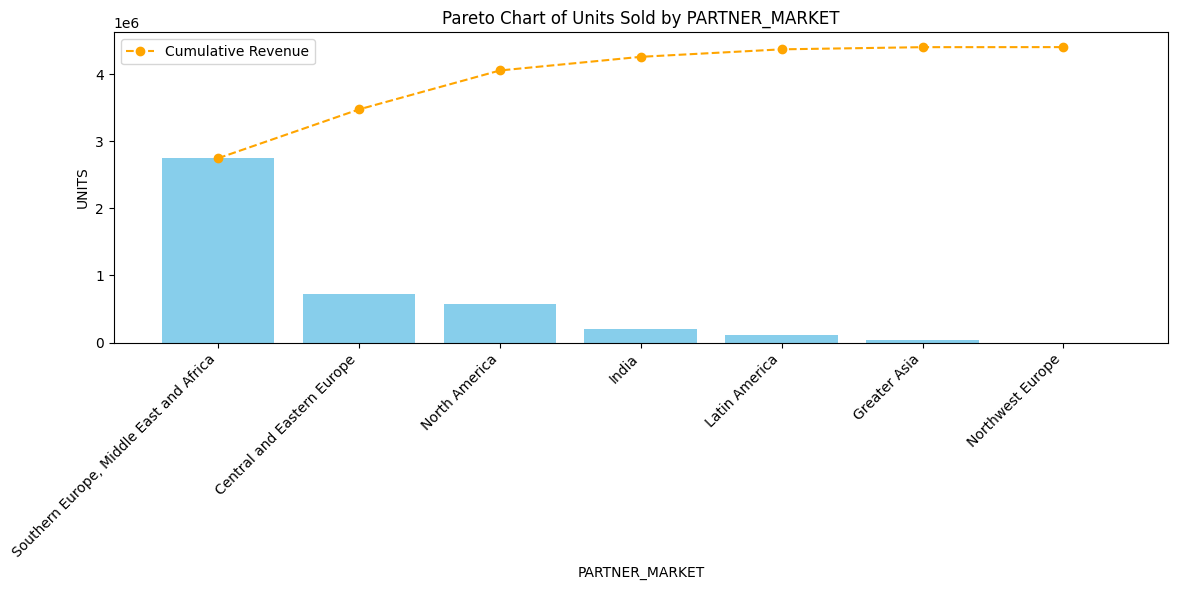

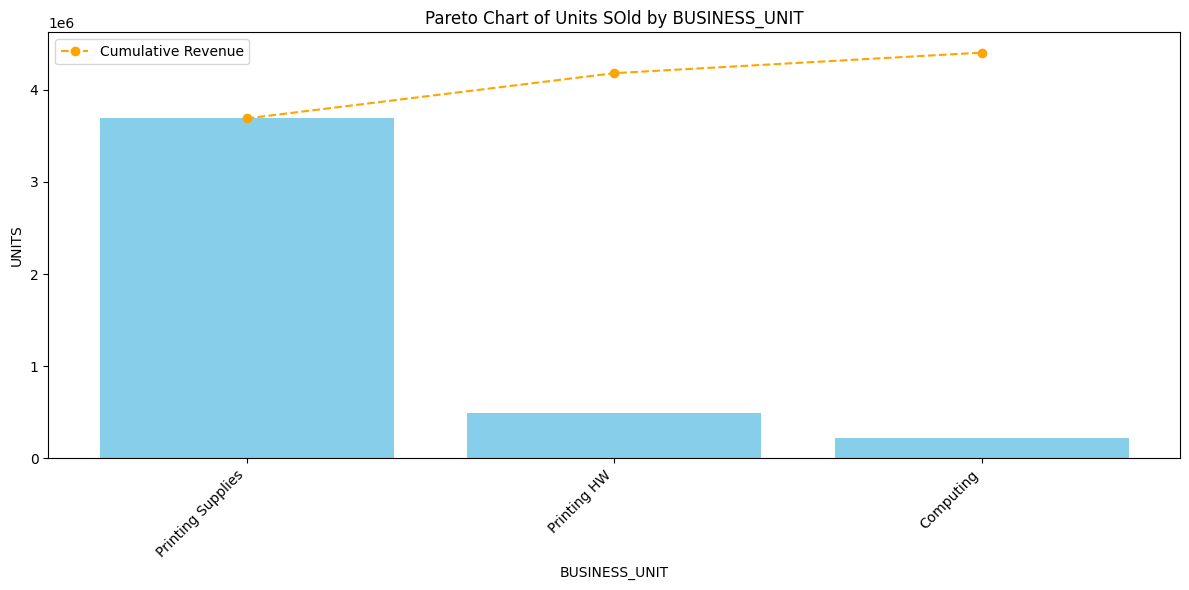

In [37]:
pareto_chart(df, 'PARTNER_MARKET', 'UNITS', 'Pareto Chart of Units Sold by PARTNER_MARKET')
print("")
# Create a Pareto chart for product units
pareto_chart(df, 'BUSINESS_UNIT', 'UNITS', 'Pareto Chart of Units SOld by BUSINESS_UNIT')

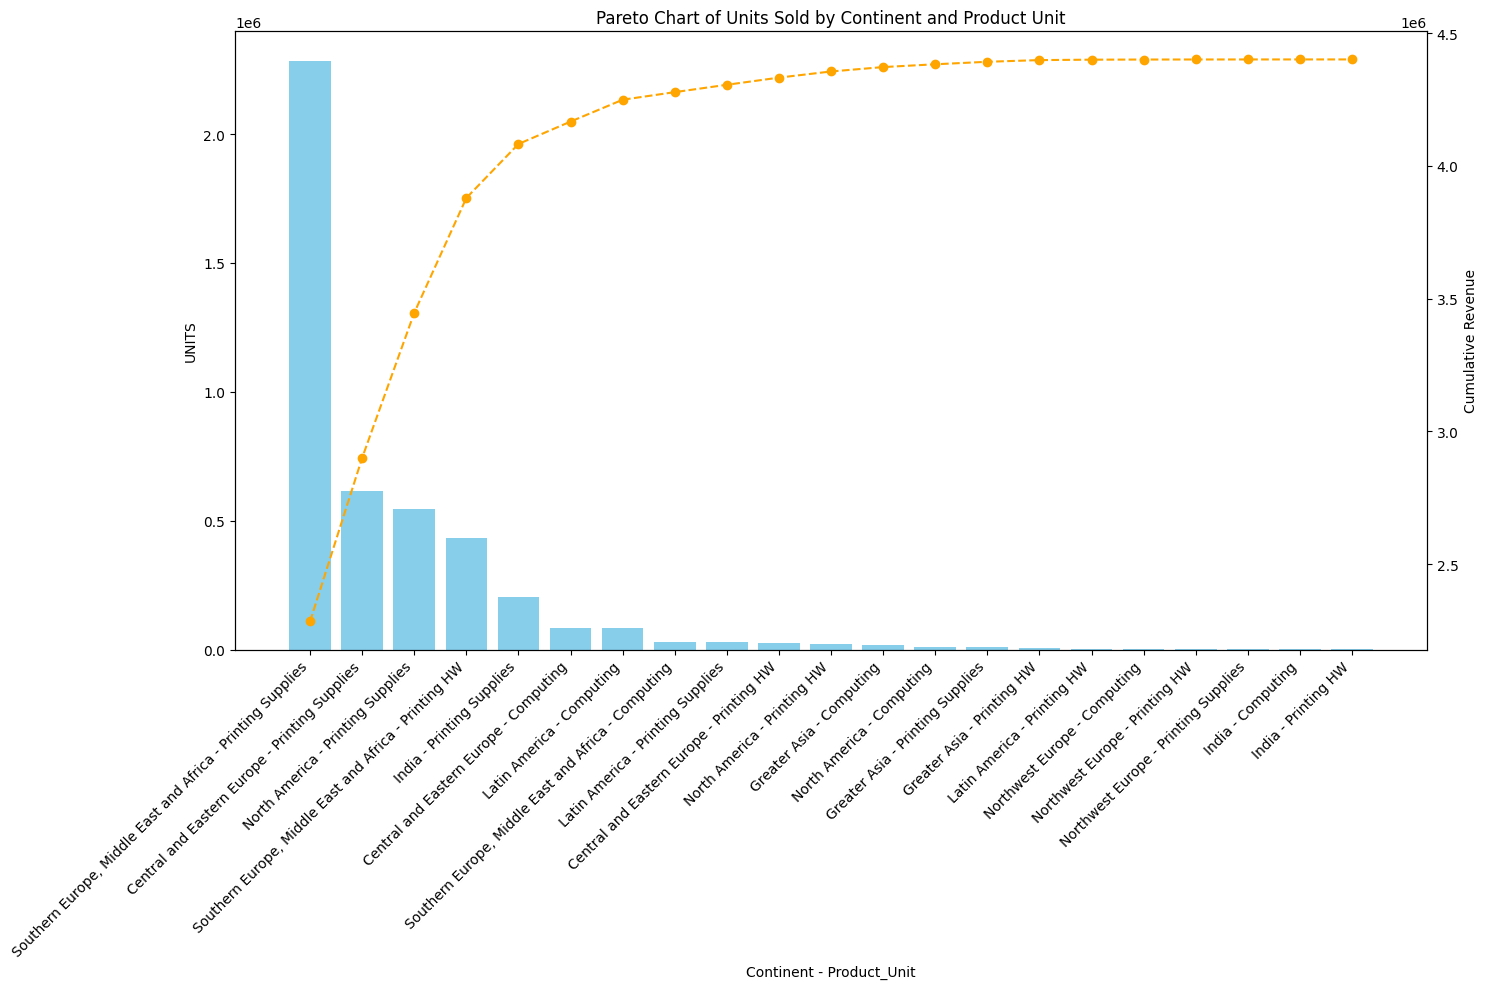

In [38]:
# Call the function to create a Pareto chart combining 'Continent' and 'Product_Unit'
plot_pareto(df, 'Continent - Product_Unit', 'UNITS', 'Pareto Chart of Units Sold by Continent and Product Unit')

Downloading the Files:

In [39]:
df.to_csv("processed.csv", index=False)